##*Part l: Understanding regularization*

1) What is regularization in the context of deep learning? Why is it important?


2) Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff?


3) Describe the concept of =1 and =2 regularization. How do they differ in terms of penalty calculation and their effects on the model?


4) Discuss the role of regularization in preventing overfitting and improving the generalization of deep
learning models.

### Part 1: Understanding Regularization

#### What is Regularization in Deep Learning?

Regularization in deep learning refers to techniques used to prevent overfitting by adding additional information or constraints to the model. It essentially penalizes complex models to encourage simpler models that are more likely to generalize well to unseen data.

#### Why is Regularization Important?

Regularization is crucial because:
- **Prevents Overfitting**: Helps the model to not memorize the training data but rather learn the underlying patterns.
- **Improves Generalization**: Ensures the model performs well on new, unseen data.
- **Enhances Model Robustness**: Reduces the risk of the model performing poorly when exposed to new data.

#### Bias-Variance Tradeoff and Regularization

The bias-variance tradeoff is a key concept in machine learning:
- **Bias**: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.
- **Variance**: Error due to too much complexity in the learning algorithm. High variance can cause overfitting.

Regularization helps in addressing this tradeoff by introducing a penalty for complexity, thus reducing variance without substantially increasing bias.

#### L1 and L2 Regularization

- **L1 Regularization (Lasso)**:
  - **Penalty Calculation**: Adds the absolute value of the coefficients to the loss function.
  - **Effect**: Can drive some coefficients to zero, effectively performing feature selection and producing sparse models.
  - **Formula**: \( \text{Loss} + \lambda \sum |w_i| \)
  
- **L2 Regularization (Ridge)**:
  - **Penalty Calculation**: Adds the squared value of the coefficients to the loss function.
  - **Effect**: Tends to shrink coefficients but rarely eliminates them, leading to smaller but non-zero weights.
  - **Formula**: \( \text{Loss} + \lambda \sum w_i^2 \)

#### Role of Regularization in Preventing Overfitting and Improving Generalization

Regularization techniques add a penalty for larger weights, discouraging the model from fitting noise in the training data. This results in:
- **Reduced Overfitting**: By penalizing complex models, regularization ensures the model captures the underlying trends rather than noise.
- **Enhanced Generalization**: A simpler model is less likely to be overly tailored to the training data and more likely to perform well on new data.

### Summary

Regularization is a powerful technique in deep learning that helps prevent overfitting by penalizing model complexity. This ensures that models not only perform well on the training data but also generalize better to unseen data, striking a balance between bias and variance.

##Part 2: **Regularization Technique**



1) Explain Dropout regularization and how it works to reduce overfitting.Discuss the impact of Dropout on model training and inference?

2) Describe the concept of Early ztopping as a form of regularization. How does it help prevent overfitting during the training process?


3)  Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting?

### Dropout Regularization

#### Explanation and Working of Dropout

- **Concept**: Dropout is a regularization technique where randomly selected neurons are ignored during training. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.
- **How It Works**:
  1. During each training iteration, each neuron is randomly dropped with a probability \( p \).
  2. This prevents the network from becoming too reliant on particular neurons, forcing it to learn more robust features.
  3. During inference (testing), dropout is turned off, and the network uses all neurons but scales the activations by the dropout probability \( p \) to maintain the same expected output.

#### Impact on Model Training and Inference

- **Training**:
  - Dropout makes the training process noisy, which helps in breaking the interdependent learning among neurons.
  - It forces the network to be redundant, improving its robustness and reducing overfitting.
- **Inference**:
  - During inference, dropout is not applied. Instead, the weights are scaled to account for the dropout probability used during training.
  - This ensures that the model's predictions are more stable and reliable.

### Early Stopping

#### Concept and Prevention of Overfitting

- **Concept**: Early stopping is a form of regularization where the training process is halted once the model's performance on a validation set stops improving.
- **How It Helps**:
  1. During training, after each epoch, the model's performance on a validation set is monitored.
  2. If the performance (typically measured by validation loss or accuracy) stops improving for a specified number of epochs (patience), the training is stopped.
  3. This prevents the model from overfitting to the training data by stopping training before the model starts to learn noise and intricate details in the training data that do not generalize well to new data.

### Batch Normalization

#### Concept and Role as Regularization

- **Concept**: Batch normalization is a technique to improve the training of deep neural networks by normalizing the inputs of each layer so that they have a mean of zero and a variance of one.
- **How It Works**:
  1. For each mini-batch during training, the mean and variance of each feature are computed.
  2. The features are normalized using these statistics.
  3. Two learnable parameters, scale (\( \gamma \)) and shift (\( \beta \)), are introduced to allow the normalized output to match the distribution the layer expects.
  
#### Helping in Preventing Overfitting

- **Stabilizes Training**: By normalizing the inputs of each layer, batch normalization stabilizes and accelerates the training process.
- **Acts as Regularization**: The noise introduced by the mini-batch statistics can have a regularizing effect, similar to dropout. This is because each mini-batch is normalized differently, introducing noise and reducing overfitting.
- **Reduces Internal Covariate Shift**: Batch normalization helps reduce the internal covariate shift, where the distribution of each layer's inputs changes during training. By normalizing the inputs, batch normalization makes the training process more stable and efficient.

### Summary

- **Dropout**: Randomly drops neurons during training to prevent over-reliance on specific neurons and improve generalization.
- **Early Stopping**: Stops training when performance on a validation set stops improving, preventing overfitting.
- **Batch Normalization**: Normalizes layer inputs to stabilize and accelerate training, while also providing a regularizing effect by introducing noise.

Together, these techniques play a critical role in enhancing the robustness, stability, and generalization capability of neural networks, ensuring they perform well on both training and unseen data.

In [1]:
##Part 3: Applyipg Regularization
#31) Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate
#3its impact on model performance and compare it with a model without Dropout

##2) Discuss the considerations and tradeoffs when choosing the appropriate regularization technique for a
###given deep learning task.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load and preprocess the dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define the model without Dropout
def create_model_without_dropout():
    model = Sequential([
        Dense(30, input_shape=(30,), activation='relu'),
        Dense(15, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Define the model with Dropout
def create_model_with_dropout():
    model = Sequential([
        Dense(30, input_shape=(30,), activation='relu'),
        Dropout(0.5),
        Dense(15, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Train and evaluate the model without Dropout
model_without_dropout = create_model_without_dropout()
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

In [8]:
# Train and evaluate the model with Dropout
model_with_dropout = create_model_with_dropout()
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

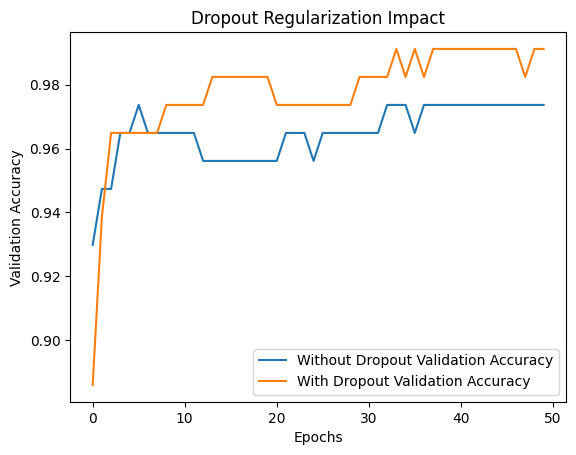

In [9]:
# Plot the training history
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout Validation Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.title('Dropout Regularization Impact')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate both models on the test set
loss_without_dropout, accuracy_without_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)
loss_with_dropout, accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)

In [11]:
print(f"Without Dropout - Test Loss: {loss_without_dropout}, Test Accuracy: {accuracy_without_dropout}")
print(f"With Dropout - Test Loss: {loss_with_dropout}, Test Accuracy: {accuracy_with_dropout}")

Without Dropout - Test Loss: 0.07957588136196136, Test Accuracy: 0.9736841917037964
With Dropout - Test Loss: 0.05130317807197571, Test Accuracy: 0.9912280440330505


### Considerations and Tradeoffs When Choosing Regularization Techniques

Choosing the appropriate regularization technique for a given deep learning task involves several considerations and tradeoffs:

1. **Model Complexity**:
   - **L1 Regularization**: Good for feature selection and sparse models. Useful when you suspect many features are irrelevant.
   - **L2 Regularization**: Helps with general weight decay and is useful when you expect all features to be somewhat relevant.
   - **Dropout**: Useful for reducing interdependencies among neurons and enhancing robustness. Particularly effective in deeper networks.

2. **Dataset Size**:
   - **Small Datasets**: Overfitting is more likely, so regularization techniques like L2 or Dropout can be crucial.
   - **Large Datasets**: The risk of overfitting is lower, but regularization can still help improve generalization.

3. **Computational Resources**:
   - **L1/L2 Regularization**: Computationally inexpensive and easy to implement.
   - **Dropout**: Adds some computational overhead due to the random dropping of neurons during training.

4. **Training Time**:
   - **Early Stopping**: Can significantly reduce training time by stopping early when the model stops improving.
   - **Dropout**: May increase training time due to the additional noise introduced in each epoch.

5. **Type of Task**:
   - **Regression Tasks**: L2 regularization is often preferred to keep weights small and ensure smooth predictions.
   - **Classification Tasks**: Dropout can be highly effective, especially in deep networks to prevent overfitting.

6. **Generalization vs. Performance**:
   - **Higher Regularization**: Improves generalization but may reduce training accuracy.
   - **Lower Regularization**: Improves training accuracy but risks overfitting and poor performance on unseen data.

### Summary

- **Dropout Regularization**: Introduces noise during training by randomly dropping neurons, reducing overfitting and improving model robustness.
- **Evaluation**: Models with Dropout can generalize better to unseen data compared to models without Dropout.
- **Choosing Regularization**: Depends on model complexity, dataset size, computational resources, training time, task type, and the tradeoff between generalization and performance.

Regularization is essential in training robust deep learning models that generalize well to new data. The choice of regularization technique should be guided by the specific requirements and constraints of the task at hand.